In [19]:
import pandas as pd
df=pd.DataFrame({'점수':[0,1,2],'타겟':[2,2,3],
                  '무게':[3,4,5],'색상':['빨강','파랑','파랑']})
df

,점수,타겟,무게,색상
0,0,2,3,빨강
1,1,2,4,파랑
2,2,3,5,파랑


In [20]:
무게_정보={3:'소',4:'중',5:'대'}
df['무게정보']=df['무게'].map(무게_정보)
t_df=pd.get_dummies(df['무게정보'])
t_df_1=pd.concat([df,t_df],axis=1)

In [21]:
t_df_1

,점수,타겟,무게,색상,무게정보,대,소,중
0,0,2,3,빨강,소,0,1,0
1,1,2,4,파랑,중,0,0,1
2,2,3,5,파랑,대,1,0,0


In [22]:
del t_df_1['무게정보']
del t_df_1['무게']

In [23]:
t_df_1

,점수,타겟,색상,대,소,중
0,0,2,빨강,0,1,0
1,1,2,파랑,0,0,1
2,2,3,파랑,1,0,0


색상이라는 데이터 프레임화

In [26]:
pd.get_dummies(t_df_1['색상'])

,빨강,파랑
0,1,0
1,0,1
2,0,1


In [27]:
pd.concat([t_df_1,pd.get_dummies(t_df_1['색상'])]) 

,점수,타겟,색상,대,소,중,빨강,파랑
0,0.0,2.0,빨강,0.0,1.0,0.0,NaN,NaN
1,1.0,2.0,파랑,0.0,0.0,1.0,NaN,NaN
2,2.0,3.0,파랑,1.0,0.0,0.0,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [28]:
pd.concat([t_df_1,pd.get_dummies(t_df_1['색상'])],axis=1)

,점수,타겟,색상,대,소,중,빨강,파랑
0,0,2,빨강,0,1,0,1,0
1,1,2,파랑,0,0,1,0,1
2,2,3,파랑,1,0,0,0,1


In [31]:
t_df_1[['점수','타겟','대','중','소']]

,점수,타겟,대,중,소
0,0,2,0,0,1
1,1,2,0,1,0
2,2,3,1,0,0


In [32]:
pd.concat([t_df_1[['점수','타겟','대','중','소']],pd.get_dummies(t_df_1['색상'])],axis=1)

,점수,타겟,대,중,소,빨강,파랑
0,0,2,0,0,1,1,0
1,1,2,0,1,0,0,1
2,2,3,1,0,0,0,1


In [33]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [35]:
bins=[0,25,50,75,100] #바인딩, = 기준을 세운다
ck_data=['F','C','B','A']
c_data=pd.cut(x=df.postTestScore,bins=bins,labels=ck_data) #첫번째 자리는 x를 기본으로 지정하기때문에 생략해도 된다 #bins도 생략가능
c_data

0     F
1     A
2     B
3     B
4     B
5     F
6     A
7     B
8     B
9     B
10    B
11    B
Name: postTestScore, dtype: category
Categories (4, object): ['F' < 'C' < 'B' < 'A']

In [39]:
df=pd.DataFrame({'data1':[5,30,25,46,55],
                 'data2':[150,120,145,182,190]})
df

,data1,data2
0,5,150
1,30,120
2,25,145
3,46,182
4,55,190


In [42]:
df['data1']-df['data1'].min()

0     0
1    25
2    20
3    41
4    50
Name: data1, dtype: int64

In [44]:
df['data1'].max()-df['data1'].min()

50

<b><h3><font color="Yellow">최솟값-최댓값 정규화

In [46]:
(df['data1']-df['data1'].min())/(df['data1'].max()-df['data1'].min())

0    0.00
1    0.50
2    0.40
3    0.82
4    1.00
Name: data1, dtype: float64

In [48]:
df.std(axis=1)

0    102.530483
1     63.639610
2     84.852814
3     96.166522
4     95.459415
dtype: float64

In [49]:
df.std(axis=0)

data1    19.408761
data2    28.614682
dtype: float64

In [50]:
df['data2'].std() #표본 표준편차 

28.614681546367066

<b><h3><font color="Yellow">z스코어 정규화

In [51]:
(df['data2']-df['data2'].mean())/(df['data2'].std())

0   -0.258609
1   -1.307021
2   -0.433344
3    0.859699
4    1.139275
Name: data2, dtype: float64

<b><h2><font color="Yellow">기계학습 -> 머신러닝<딥러닝>

In [60]:
#데이터용
import pandas as pd
import numpy as np
#시각화용
import matplotlib.pyplot as plt
import seaborn as sns

<b><h3><font color="Yellow">데이터로드 - 데이터 획득

In [52]:
pd.read_csv('test.csv')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [56]:
df=pd.concat([df1,df2])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
df=pd.concat([df1,df2],sort=False)
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [66]:
#데이터 통합
df=pd.concat([pd.read_csv('train.csv'),pd.read_csv('test.csv')],sort=False)
#인덱스 재정의
df=df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

<b><h3><font color="Yellow">데이터 전처리 - 데이터 정제

In [ ]:
#1.결측치
train_y=train_df.pop('Survived')
train_y

In [69]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
train_df.head(2).T #보기편하게 head갯수만큼의 정보를 세로로 볼수 있다

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [71]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
#1.결측치
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [75]:
#1.결측치
del df['Survived']
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
df.isnull().sum()/len(df)*100 #결측치 확인

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [77]:
df[df['Age'].notnull()].groupby(['Sex'])['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [78]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [80]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].transform('mean')

0       24.816367
1       39.159930
2       24.816367
3       39.159930
4       24.816367
          ...    
1300    24.816367
1302    39.159930
1303    24.816367
1305    39.159930
1306    24.816367
Name: Age, Length: 1046, dtype: float64

In [79]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [81]:
df.groupby(['Pclass'])['Age'].transform('mean')

0       24.816367
1       39.159930
2       24.816367
3       39.159930
4       24.816367
          ...    
1304    24.816367
1305    39.159930
1306    24.816367
1307    24.816367
1308    24.816367
Name: Age, Length: 1309, dtype: float64

In [82]:
df['Age'].fillna(df.groupby(['Pclass'])['Age'].transform('mean'))

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    24.816367
1305    39.000000
1306    38.500000
1307    24.816367
1308    24.816367
Name: Age, Length: 1309, dtype: float64

In [84]:
df['Age'].fillna(df.groupby(['Pclass'])['Age'].transform('mean'),inplace=True) #기본값이 소수점 6째자리까지 나타낸다

In [85]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S


In [86]:
pd.options.display.float_format='{:.2f}'.format # 포맷의 규칙(소수점 2째자리까지만 표시)을 적용

In [87]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [88]:
df.isnull().sum()/len(df)*100 #결측치 확인

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [89]:
df.Embarked

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

In [90]:
df.loc[61,'Embarked']='S'
df.loc[829,'Embarked']='S'

In [91]:
df.isnull().sum()/len(df)*100 #결측치 확인

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.00
dtype: float64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [93]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [98]:
oj_colums=['PassengerId','Pclass','Name','Sex','Ticket','Cabin','Embarked']
num_colums=['Age','SibSp','Parch','Fare'] #고칠때 AS 메서드 사용
for i in oj_colums:
  df[i]=df[i].astype(object)
for i in num_colums:
  df[i]=df[i].astype(float)
df['Parch']=df['Parch'].astype(int) #astype 타입을 고친다 -> 타입을 바꾸는것
df['SibSp']=df['SibSp'].astype(int) #직적 사용 하는것을 권장

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Pclass       1309 non-null   object 
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 112.6+ KB


In [108]:
pd.get_dummies(df['Sex'],prefix='성별')

,성별_female,성별_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


In [109]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [113]:
pd.merge(df,pd.get_dummies(df['Sex'],prefix='성별'),how='inner')#인덱스를 설정해주지 않았기 때문에 error가 발생한다

MergeError: ignored

In [114]:
pd.merge(df,pd.get_dummies(df['Sex'],prefix='성별'),how='inner',left_index=True,right_index=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,성별_female,성별_male
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0,1
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S,0,1


In [119]:
o_h_d=pd.merge(df,pd.get_dummies(df['Sex'],prefix='Sex'),how='inner',left_index=True,right_index=True)
o_h_d=pd.merge(o_h_d,pd.get_dummies(df['Pclass'],prefix='Pclass'),how='inner',left_index=True,right_index=True)
o_h_d=pd.merge(o_h_d,pd.get_dummies(df['Embarked'],prefix='Embarked'),how='inner',left_index=True,right_index=True)

In [120]:
o_h_d

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S,0,1,0,0,1,0,0,1


In [117]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.82,0,0,A.5. 3236,8.05,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.82,0,0,359309,8.05,NaN,S


In [121]:
train_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [125]:
pd.merge(df.Sex,train_y)

MergeError: ignored

In [124]:
pd.merge(df.Sex,train_y,left_index=True,right_index=True) #인덱스를 주면 양쪽의 인덱스가 일치하는것만으로해서 데이터 프레임을 만들수있다.

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [136]:
pd.merge(o_h_d.Sex,train_y,left_index=True,right_index=True)

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


서브코드로 설명

In [130]:
#서브
data_d={
    '이름':['홍길동','도우너',np.nan,'둘리','또치'], #np.nan은 넘파이 상에서 결측치를 나타냄
    '나이':[38,10,np.nan,3,5],
    '성별':['남','남',np.nan,'남','여'],
    '중간_점수':[50,np.nan,np.nan,3,5],
    '기말_점수':[25,np.nan,np.nan,60,50]
}
df=pd.DataFrame(data_d,columns=['이름','나이','성별','중간_점수','기말_점수'])
df['정답']=pd.Series([1,1,1,0,0])
X=df[['이름','나이','성별','중간_점수','기말_점수']]
X


,이름,나이,성별,중간_점수,기말_점수
0,홍길동,38.00,남,50.00,25.00
1,도우너,10.00,남,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,둘리,3.00,남,3.00,60.00
4,또치,5.00,여,5.00,50.00


In [131]:
#서브
data_d={
    '이름':['홍길동','도우너',np.nan,'둘리','또치'], #np.nan은 넘파이 상에서 결측치를 나타냄
    '나이':[38,10,np.nan,3,5],
    '성별':['남','남',np.nan,'남','여'],
    '중간_점수':[50,np.nan,np.nan,3,5],
    '기말_점수':[25,np.nan,np.nan,60,50]
}
df=pd.DataFrame(data_d,columns=['이름','나이','성별','중간_점수','기말_점수'])
df['정답']=pd.Series([1,1,1,0,0])
X=df[['이름','나이','성별','중간_점수','기말_점수']]
X
Y=df[['정답']]
Y

,정답
0,1
1,1
2,1
3,0
4,0


In [132]:
#서브
data_d={
    '이름':['홍길동','도우너',np.nan,'둘리','또치'], #np.nan은 넘파이 상에서 결측치를 나타냄
    '나이':[38,10,np.nan,3,5],
    '성별':['남','남',np.nan,'남','여'],
    '중간_점수':[50,np.nan,np.nan,3,5],
    '기말_점수':[25,np.nan,np.nan,60,50]
}
df=pd.DataFrame(data_d,columns=['이름','나이','성별','중간_점수','기말_점수'])
df['정답']=pd.Series([1,1,1,0,0])
X=df[['이름','나이','성별','중간_점수','기말_점수']]
X=X.dropna()
Y=df[['정답']]
pd.merge(X,Y)

MergeError: ignored

In [135]:
#서브
data_d={
    '이름':['홍길동','도우너',np.nan,'둘리','또치'], #np.nan은 넘파이 상에서 결측치를 나타냄
    '나이':[38,10,np.nan,3,5],
    '성별':['남','남',np.nan,'남','여'],
    '중간_점수':[50,np.nan,np.nan,3,5],
    '기말_점수':[25,np.nan,np.nan,60,50]
}
df=pd.DataFrame(data_d,columns=['이름','나이','성별','중간_점수','기말_점수'])
df['정답']=pd.Series([1,1,1,0,0])
X=df[['이름','나이','성별','중간_점수','기말_점수']]
X=X.dropna()
Y=df[['정답']]
pd.merge(X,Y,left_index=True,right_index=True)

,이름,나이,성별,중간_점수,기말_점수,정답
0,홍길동,38.00,남,50.00,25.00,1
3,둘리,3.00,남,3.00,60.00,0
4,또치,5.00,여,5.00,50.00,0


서브코드 -> data 시각화<br>
전달 : 내용 전달이 목적<br>
검토 : 가설의 검증 목적

In [140]:
# 1.확인할 data 정리
pd.merge(o_h_d.Sex,train_y,left_index=True,right_index=True)


,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


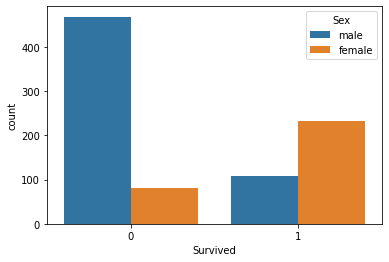

In [144]:
sns.countplot(x='Survived',hue='Sex',data=pd.merge(o_h_d.Sex,train_y,left_index=True,right_index=True))

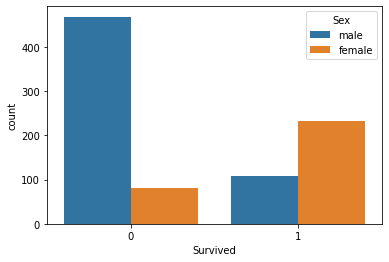

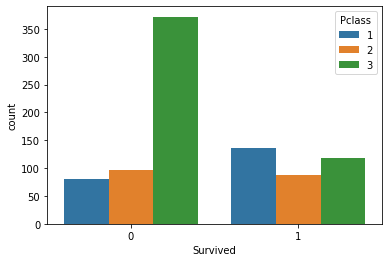

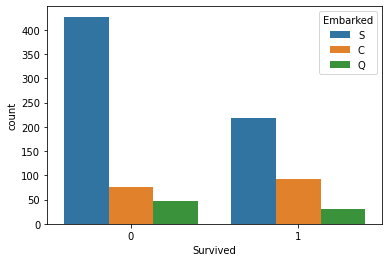

In [151]:
sns.countplot(x='Survived',hue='Sex',data=pd.merge(o_h_d.Sex,train_y,left_index=True,right_index=True))
plt.show()
sns.countplot(x='Survived',hue='Pclass',data=pd.merge(o_h_d.Pclass,train_y,left_index=True,right_index=True))
plt.show()
sns.countplot(x='Survived',hue='Embarked',data=pd.merge(o_h_d.Embarked,train_y,left_index=True,right_index=True))
plt.show()

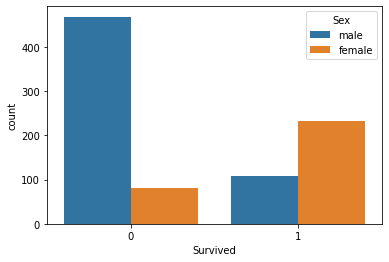

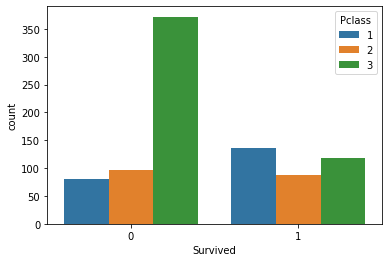

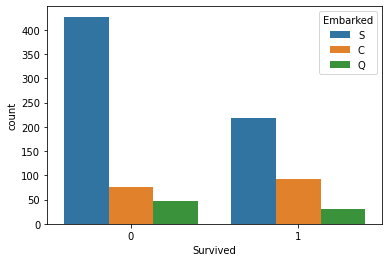

In [153]:
sns.countplot(x='Survived',hue='Sex',data=pd.merge(o_h_d['Sex'],train_y,left_index=True,right_index=True))
plt.show()
sns.countplot(x='Survived',hue='Pclass',data=pd.merge(o_h_d['Pclass'],train_y,left_index=True,right_index=True))
plt.show()
sns.countplot(x='Survived',hue='Embarked',data=pd.merge(o_h_d['Embarked'],train_y,left_index=True,right_index=True))
plt.show()

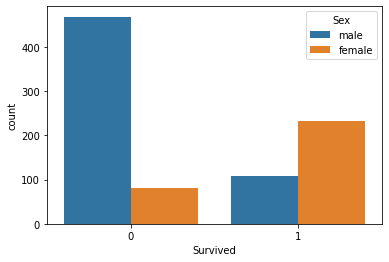

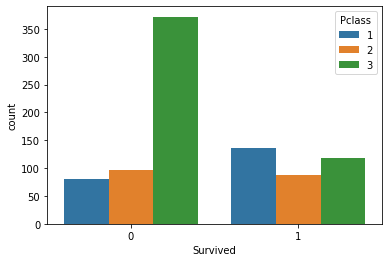

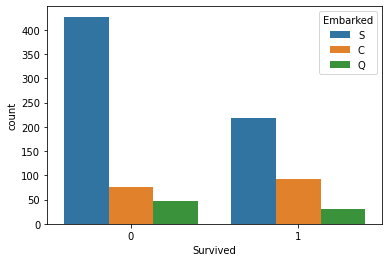

In [163]:
c_l=['Sex','Pclass','Embarked']
for i in c_l:
  sns.countplot(x='Survived',hue=i,data=pd.merge(o_h_d[i],train_y,left_index=True,right_index=True))
  plt.show()

In [170]:
c_l=['Sex','Pclass','Embarked']
c_t_data=pd.merge(o_h_d[c_l], train_y, left_index=True, right_index=True)
c_t_data

,Sex,Pclass,Embarked,Survived
0,male,3,S,0
1,female,1,C,1
2,female,3,S,1
3,female,1,S,1
4,male,3,S,0
...,...,...,...,...
886,male,2,S,0
887,female,1,S,1
888,female,3,S,0
889,male,1,C,1


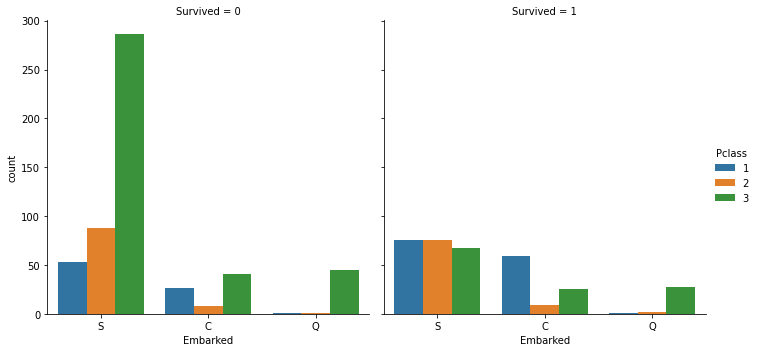

In [171]:
sns.catplot(x='Embarked', hue='Pclass', col='Survived',kind='count',data=c_t_data)

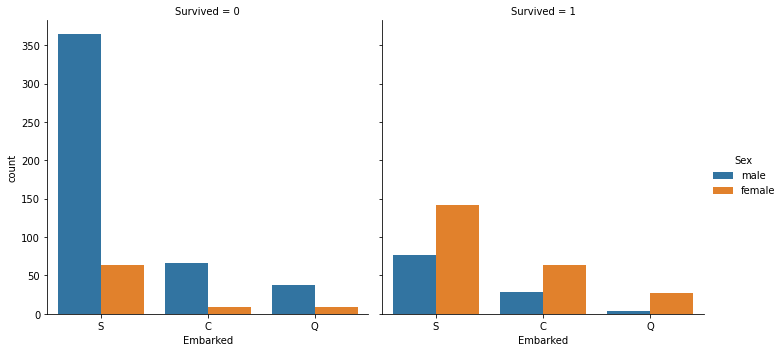

In [172]:
sns.catplot(x='Embarked', hue='Sex', col='Survived',kind='count',data=c_t_data)

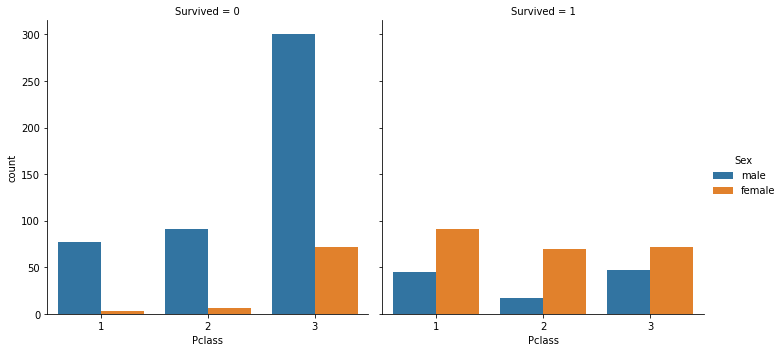

In [173]:
sns.catplot(x='Pclass', hue='Sex', col='Survived',kind='count',data=c_t_data)

In [176]:
o_h_d.columns.tolist() #tolist : 리스트로 바꿔준다

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [177]:
c_l

['Sex', 'Pclass', 'Embarked']

In [187]:
for i in o_h_d.columns.tolist():
  if i.split('_')[0] in c_l and '_' in i:
    print(i,end=":")
    print(i.split('_')[0])

Sex_female:Sex
Sex_male:Sex
Pclass_1:Pclass
Pclass_2:Pclass
Pclass_3:Pclass
Embarked_C:Embarked
Embarked_Q:Embarked
Embarked_S:Embarked


In [188]:
go_l=[col_name for col_name in o_h_d.columns.tolist() if i.split('_')[0] in c_l and '_' in col_name]
go_l

['Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [189]:
o_h_d[go_l]

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1304,0,1,0,0,1,0,0,1
1305,1,0,1,0,0,1,0,0
1306,0,1,0,0,1,0,0,1
1307,0,1,0,0,1,0,0,1


In [191]:
pd.merge(o_h_d[go_l], train_y, left_index=True, right_index=True)

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,0,1,0,0,1
2,1,0,0,0,1,0,0,1,1
3,1,0,1,0,0,0,0,1,1
4,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,0
887,1,0,1,0,0,0,0,1,1
888,1,0,0,0,1,0,0,1,0
889,0,1,1,0,0,1,0,0,1


In [192]:
te_d=pd.merge(o_h_d[go_l], train_y, left_index=True, right_index=True)

In [194]:
te_d.corr() #상관갯수 관련 메소드 #1에 가까울수록 상관관계가 높다, 같다 #-1(음의 상관관계)에 가까울수록 상반관계가 높다, 대조
#피쳐(차원 축)가 늘어나면 학습이 잘된다.
#피쳐가 늘어나면 차원이 늘어나고 학습이 잘 안된다.(오버피팅) -> 차원의 축소 필요 ->비지도 학습필요
#필요없는 정보가 많으면 학습이 잘 안된다

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
Sex_female,1.00,-1.00,0.10,0.06,-0.14,0.08,0.07,-0.12,0.54
Sex_male,-1.00,1.00,-0.10,-0.06,0.14,-0.08,-0.07,0.12,-0.54
Pclass_1,0.10,-0.10,1.00,-0.29,-0.63,0.30,-0.16,-0.16,0.29
Pclass_2,0.06,-0.06,-0.29,1.00,-0.57,-0.13,-0.13,0.19,0.09
Pclass_3,-0.14,0.14,-0.63,-0.57,1.00,-0.15,0.24,-0.02,-0.32
Embarked_C,0.08,-0.08,0.30,-0.13,-0.15,1.00,-0.15,-0.78,0.17
Embarked_Q,0.07,-0.07,-0.16,-0.13,0.24,-0.15,1.00,-0.50,0.00
Embarked_S,-0.12,0.12,-0.16,0.19,-0.02,-0.78,-0.50,1.00,-0.15
Survived,0.54,-0.54,0.29,0.09,-0.32,0.17,0.00,-0.15,1.00


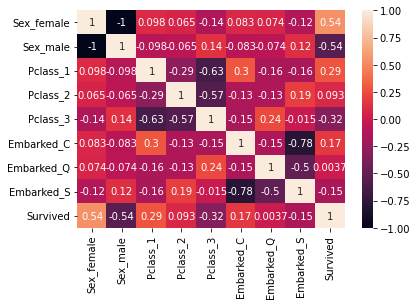

In [195]:
sns.heatmap(te_d.corr(),annot=True)

In [ ]:
# 2.이상치

In [ ]:
# 3.데이터정리

In [ ]:
# 4.범위조정

<b><h3><font color="Yellow">데이터셋 정리 - 테스트,검증,학습

<b><h3><font color="Yellow">모델생성 - 결정,생성 등

<b><h3><font color="Yellow">학습 - (지도, 비지도, 강화)

<b><h3><font color="Yellow">테스트 및 검증

<b><h3><font color="Yellow">모델완성

<b><h3><font color="Yellow">